# Project Theme: Premier League Football

The data represents the season from 2019/2020, each row is one game result.

#### Goal: 
I would like to achieve repestenting a comparison of the actual points vs. expected points from the teams and the games. 

#### weaknesses and potential:
There is a lot of information inside the csv data file and it has potential. However, at first, it was difficult to understand the data since every header of the columns is abbreviated, I could not understand what every column was representing. 
#### programming techniques:
I used several technologies; Matplotlib is a python library that helps to create visualizations and pandas helps to analyze the data. 


In [65]:
#Import libraries that we will need
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


In [66]:
# acquire the data
filename = './epl2020.csv'
data = pd.read_csv(filename)

#I would like to see the columns that have the information about
#the actual points and expected points
data.filter(items=['xpts','pts'])

,xpts,pts
0,2.3863,3
1,0.4405,0
2,2.6312,3
3,0.2522,0
4,1.0172,1
...,...,...
571,0.2901,0
572,0.3539,0
573,2.4269,3
574,0.2673,0


In [67]:
#since each row represents the games, the teams are repeted many times in our data. 
#We need to get every unique name of teamId. We can achieve this by using the function unique()
team_names = data.teamId.unique() 

#actual and expected points for each team
actual_points = {}
expected_points = {}

for team in team_names:
    actual_points[team] = data[data['teamId'] == team].pts.sum()
    expected_points[team] = data[data['teamId'] == team].xpts.sum()

In [68]:
# difference between actual points and expected points
difference = {team: actual_points[team] - expected_points[team] for team in team_names}
#sorting our data
sorted_teams = sorted(difference.keys(), key=pts_difference.get)

Text(0.5, 0, 'Points')

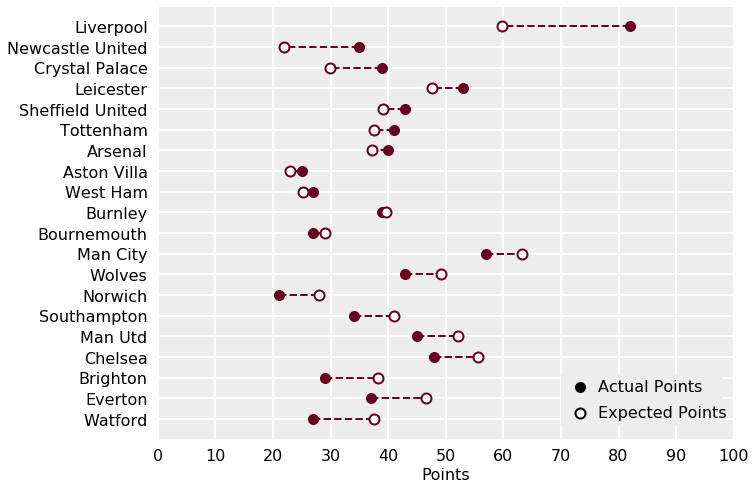

In [72]:
# Create figure
figure = plt.figure(figsize=(8,6))
axe = figure.add_axes([0, 0, 1, 1])

# Create data points and connect them with a dashed line
#y value corresponds to the spacing between team entries
yValue = 0
for team in sorted_teams:
    #differentiate colors between actual vs expected points
    if actual_points[team] > expected_points[team]:
        fill_color = colors(0)
    else:
        fill_color = colors(1)
    #connect  the two within a dashed line
    axe.plot([actual_points[team], expected_points[team]], [yValue, yValue], linestyle='--', linewidth=2, color=fill_color)
    axe.plot(actual_points[team], yValue, 'o', color=fill_color, markersize=10)
    axe.plot(expected_points[team], yValue, 'o', color='white', markeredgecolor=fill_color, markeredgewidth=2, markersize=10)
    yValue += 1
    
    
# Add legend with inset
leg = figure.add_axes([0.7, 0.03, 0.28, 0.12])
leg.plot([0], [1], 'o', color='black', markersize=10)
leg.text(0.3, 1, 'Actual Points', ha='left', va='center')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Expected Points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

# Add grid
axe.grid(color='white', linewidth=2)
# Points labels
axe.set_xticks(np.arange(0, 110, 10))
# Team labels
axe.set_yticks(np.arange(0, len(sorted_teams), 1))
axe.set_yticklabels(sorted_teams)
# Set axis limits
axe.set_xlim(0, 100)
# Set axis labels
axe.set_xlabel('Points')

### Findings: 
    The actual points vs. expected points reflect some interesting information. 
    From the data, I can visualize above not only Liverpool is apparently the best team 
    but it is the team that overcomes more their expected points.

### References:

pandas.DataFrame.filter — pandas 1.2.0 documentation. (2021). Retrieved 11 January 2021, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html

Matplotlib: Python plotting — Matplotlib 3.3.3 documentation. (2021). Retrieved 11 January 2021, from https://matplotlib.org/

Alberca, A. (2021). La librería Pandas | Aprende con Alf. Retrieved 11 January 2021, from https://aprendeconalf.es/docencia/python/manual/pandas/

##### Data obtained from:
English Premier League stats 2019-2020. (2021). Retrieved 11 January 2021, from https://www.kaggle.com/idoyo92/epl-stats-20192020